In [6]:
import csv
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
import praw
from nltk.corpus import stopwords, wordnet
from nltk.probability import FreqDist
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer, sent_tokenize, word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from bs4 import BeautifulSoup
from wordcloud import WordCloud, STOPWORDS
from praw.models import MoreComments
from gensim import models
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from spellchecker import SpellChecker

In [4]:
post_comments = pd.read_csv("startup_comments.csv", index_col=0)

In [14]:
post_comments['Post Title'].value_counts()

Start-Up [Episode 14]                                             3596
Start-Up [Episode 12]                                             3506
Start-Up [Episode 10]                                             3100
Start-Up [Episode 16] FINALE                                      2360
Start-Up [Episode 15]                                             2286
Start-Up [Episode 8]                                              2183
Start-Up [Episode 9]                                              2032
Start-Up [Episode 11]                                             1688
Start-Up [Episode 13]                                             1530
Start-Up [Episode 7]                                              1467
Start-Up [Episode 6]                                              1217
Start-Up [Episodes 3 & 4]                                         1216
Start-Up [Episode 5]                                               880
Start-Up [Episodes 1 & 2] Premiere                                 654
Start-

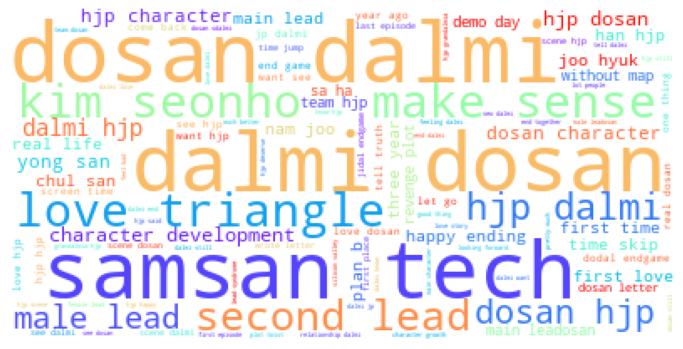

In [45]:
abstract = post_comments['clean_comment'].tolist()
wordcloud = WordCloud(background_color = 'white', colormap='rainbow', max_words=100, max_font_size=50, random_state=42, collocation_threshold=2).generate(str(abstract))
print(wordcloud)
fig = plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
# fig.savefig('1-overview-wc.png', dpi=300)

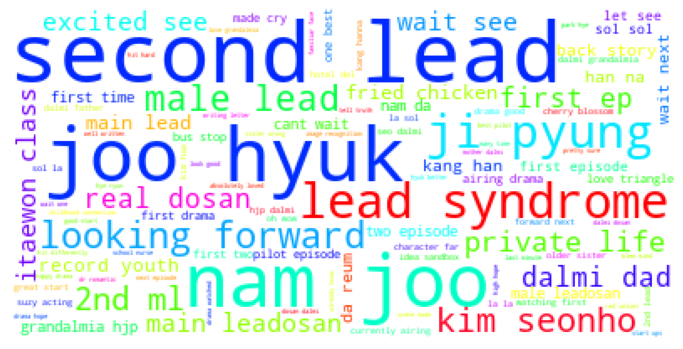

In [22]:
ep1con = (post_comments['Post Title']=="Start-Up [Episodes 1 & 2] Premiere")
ep1and2_df = post_comments[ep1con]
abstract_ep1and2 = ep1and2_df['clean_comment'].tolist()
wordcloud = WordCloud(background_color = 'white', colormap='gist_rainbow', max_words=100, max_font_size=50, random_state=42, collocation_threshold=2).generate(str(abstract_ep1and2))
print(wordcloud)
fig = plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
# fig.savefig('2-ep1and2-wc.png')

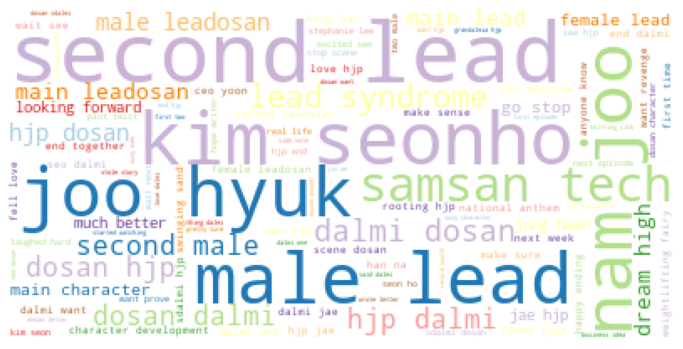

In [23]:
ep3con=((post_comments['Post Title']=="Start-Up [Episodes 3 & 4] Part 2"))
ep3con2= ((post_comments['Post Title']=="Start-Up [Episodes 3 & 4]"))
ep3and4_df = post_comments[ep3con2|ep3con]
abstract_ep3and4 = ep3and4_df['clean_comment'].tolist()
ep3and4_df
wordcloud = WordCloud(background_color = 'white', colormap='Paired', max_words=100, max_font_size=50, random_state=42, collocation_threshold=2).generate(str(abstract_ep3and4))
print(wordcloud)
fig = plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
# fig.savefig('3-ep3and4-WC.png', dpi=1000)

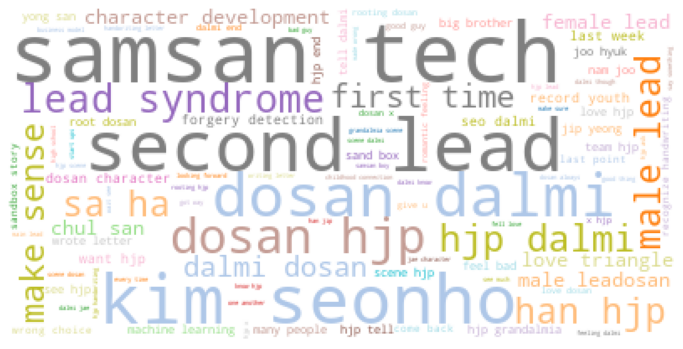

In [24]:
ep5con = (post_comments['Post Title']=="Start-Up [Episode 5]")
ep5_df = post_comments[ep5con]
abstract_ep5 = ep5_df['clean_comment'].tolist()
wordcloud = WordCloud(background_color = 'white', colormap='tab20', max_words=100, max_font_size=50, random_state=42, collocation_threshold=2).generate(str(abstract_ep5))
fig = plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
# fig.savefig('4-ep5-WC.png', dpi=1000)

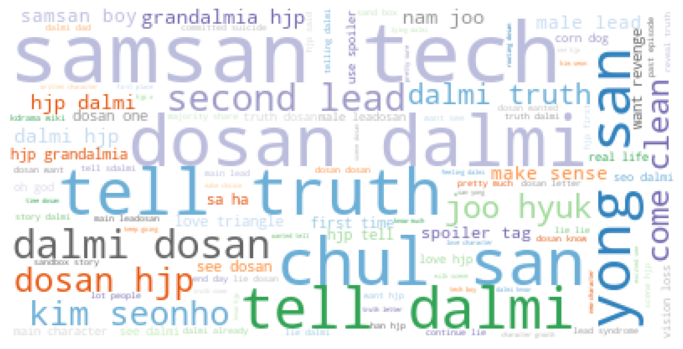

In [25]:
ep6con = (post_comments['Post Title']=="Start-Up [Episode 6]")
ep6_df = post_comments[ep6con]
abstract_ep6 = ep6_df['clean_comment'].tolist()
wordcloud = WordCloud(background_color = 'white', colormap='tab20c', max_words=100, max_font_size=50, random_state=42, collocation_threshold=2).generate(str(abstract_ep6))
print(wordcloud)
fig = plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
# fig.savefig('5-ep6-WC.png', dpi=1000)

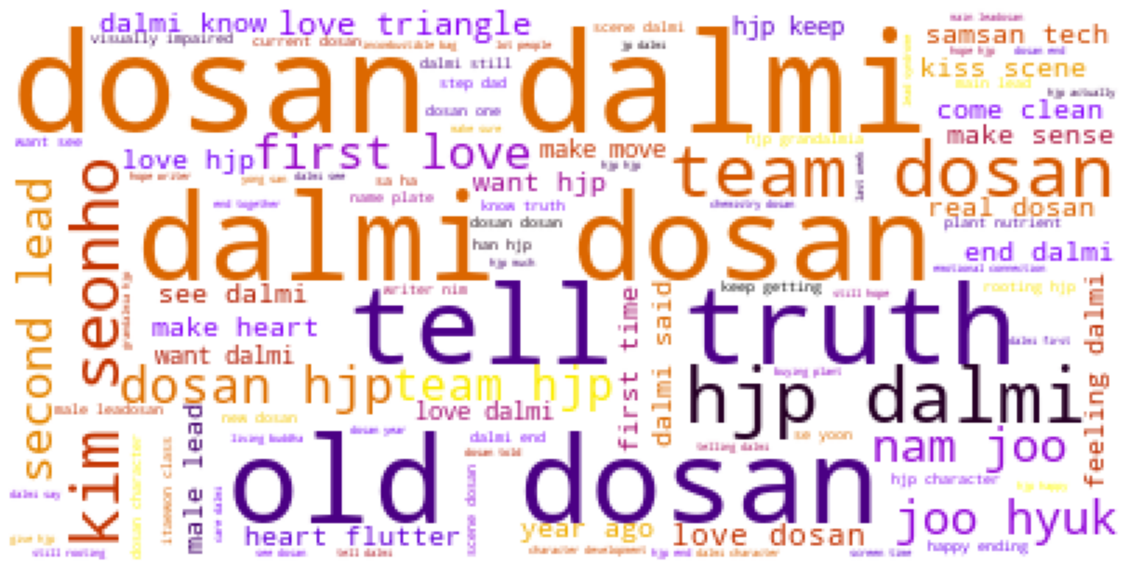

In [46]:
ep7con = (post_comments['Post Title']=="Start-Up [Episode 7]")
ep7_df = post_comments[ep7con]
abstract_ep7 = ep7_df['clean_comment'].tolist()
wordcloud = WordCloud(background_color = 'white', colormap='gnuplot', max_words=100, max_font_size=50, random_state=42, collocation_threshold=2).generate(str(abstract_ep7))
print(wordcloud)
fig = plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
# fig.savefig('6-ep7-WC.png', dpi=1000)

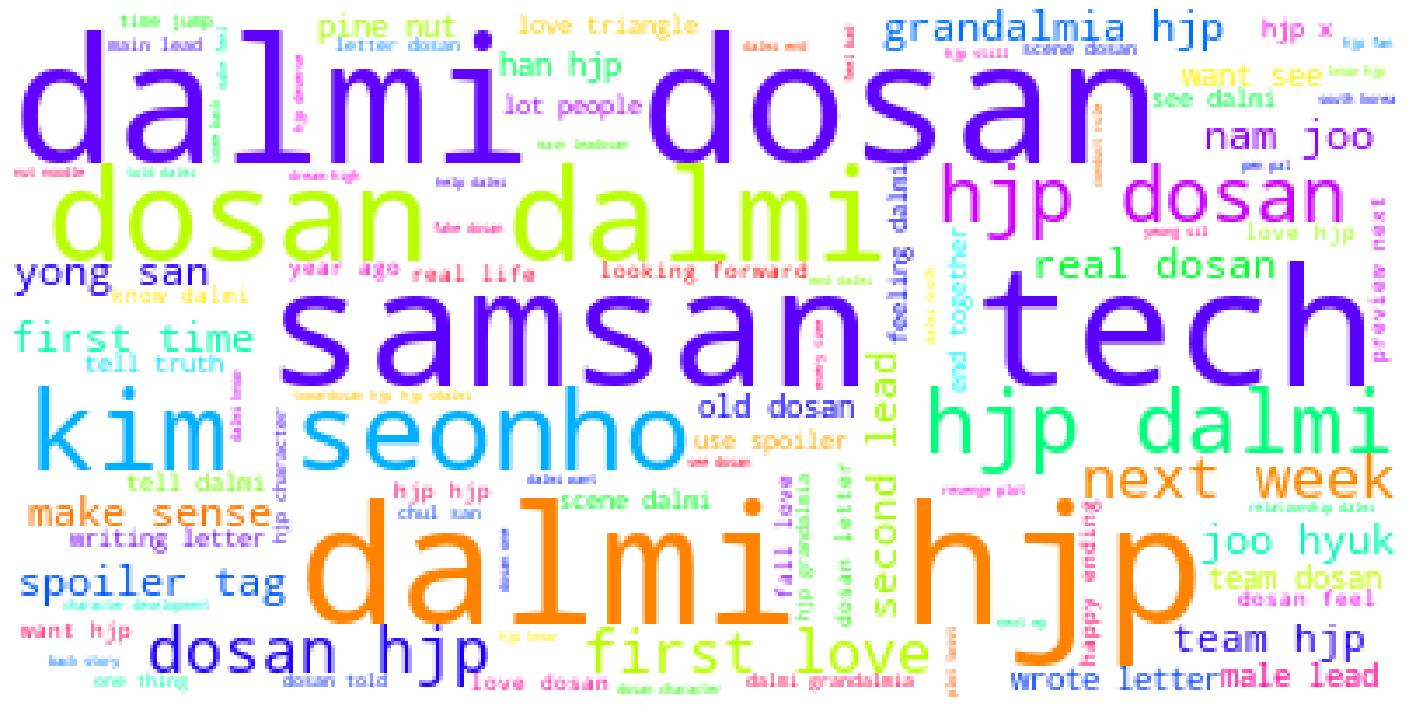

In [47]:
ep8con = (post_comments['Post Title']=="Start-Up [Episode 8]")
ep8_df = post_comments[ep8con]
abstract_ep8 = ep8_df['clean_comment'].tolist()
wordcloud = WordCloud(background_color = 'white', colormap='hsv', max_words=100, max_font_size=50, random_state=42, collocation_threshold=2).generate(str(abstract_ep8))
print(wordcloud)
fig = plt.figure(figsize=(25,25))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
# fig.savefig('7-ep8-WC.png', dpi=1000)

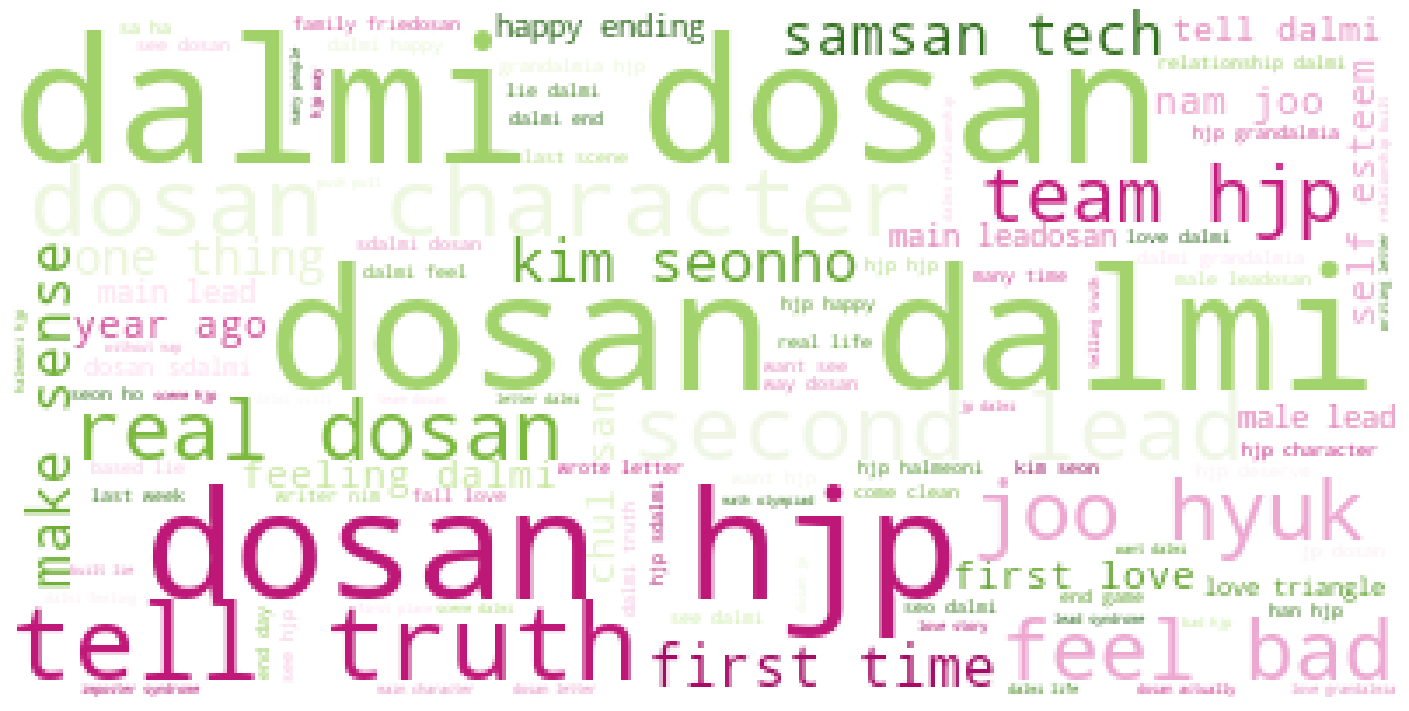

In [48]:
ep9con = (post_comments['Post Title']=="Start-Up [Episode 9]")
ep9_df = post_comments[ep9con]
abstract_ep9 = ep9_df['clean_comment'].tolist()
wordcloud = WordCloud(background_color = 'white', colormap='PiYG', max_words=100, max_font_size=50, random_state=42, collocation_threshold=2).generate(str(abstract_ep9))
print(wordcloud)
fig = plt.figure(figsize=(25,25))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
# fig.savefig('8-ep9-WC.png', dpi=1000)

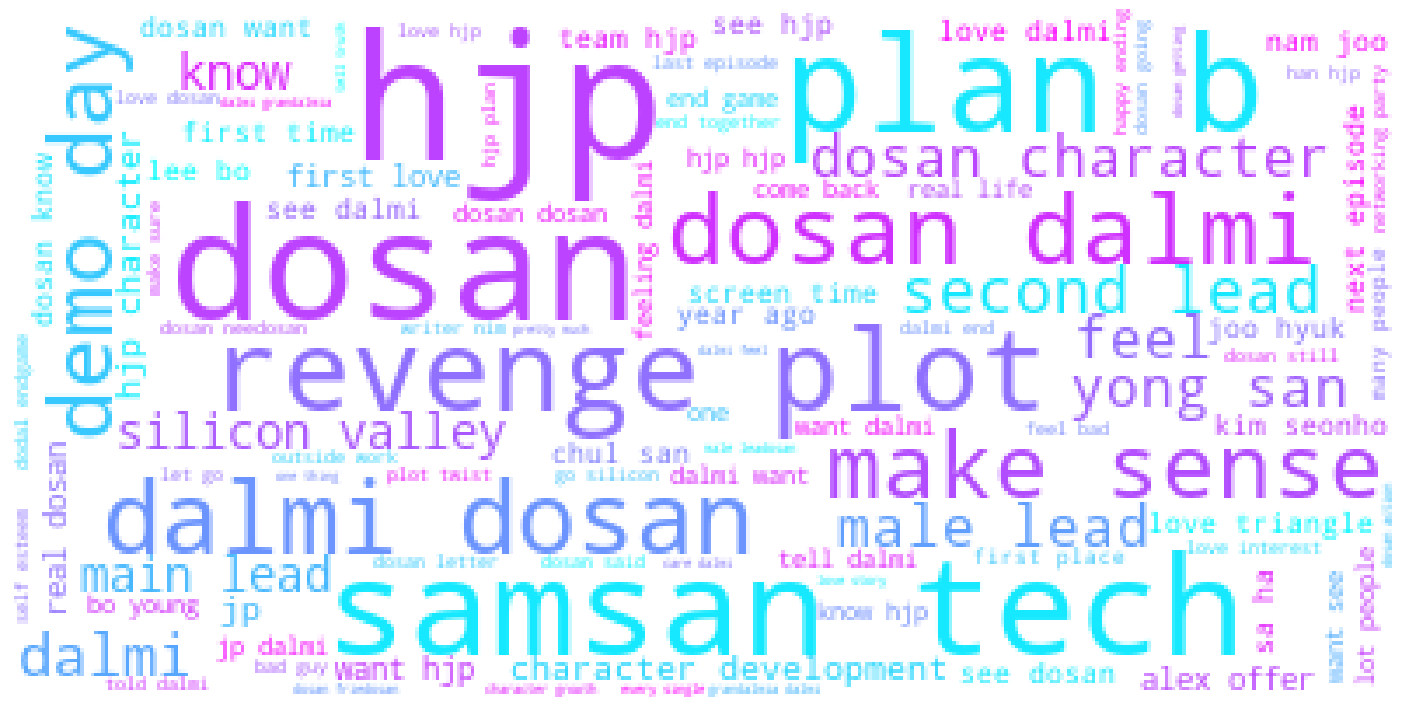

In [50]:
ep10con = (post_comments['Post Title']=="Start-Up [Episode 10]")
ep10_df = post_comments[ep10con]
abstract_ep10 = ep10_df['clean_comment'].tolist()
wordcloud = WordCloud(background_color = 'white', colormap='cool', max_words=100, max_font_size=50, random_state=42, collocation_threshold=3).generate(str(abstract_ep10))
print(wordcloud)
fig = plt.figure(figsize=(25,25))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
# fig.savefig('9-ep10-WC.png', dpi=1000)

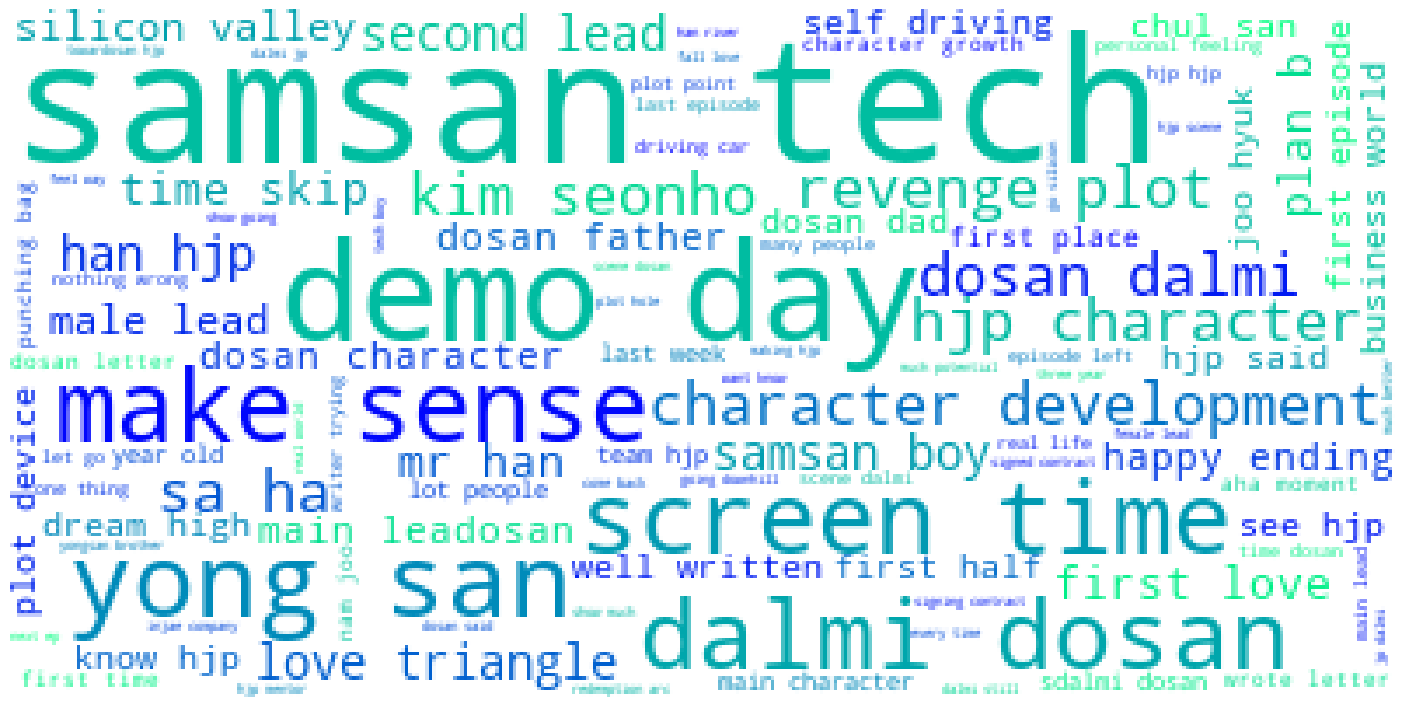

In [51]:
ep11con = (post_comments['Post Title']=="Start-Up [Episode 11]")
ep11_df = post_comments[ep11con]
abstract_ep11 = ep11_df['clean_comment'].tolist()
wordcloud = WordCloud(background_color = 'white', colormap='winter', max_words=100, max_font_size=50, random_state=42, collocation_threshold=2).generate(str(abstract_ep11))
print(wordcloud)
fig = plt.figure(figsize=(25,25))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
# fig.savefig('10-ep11-WC.png', dpi=1000)

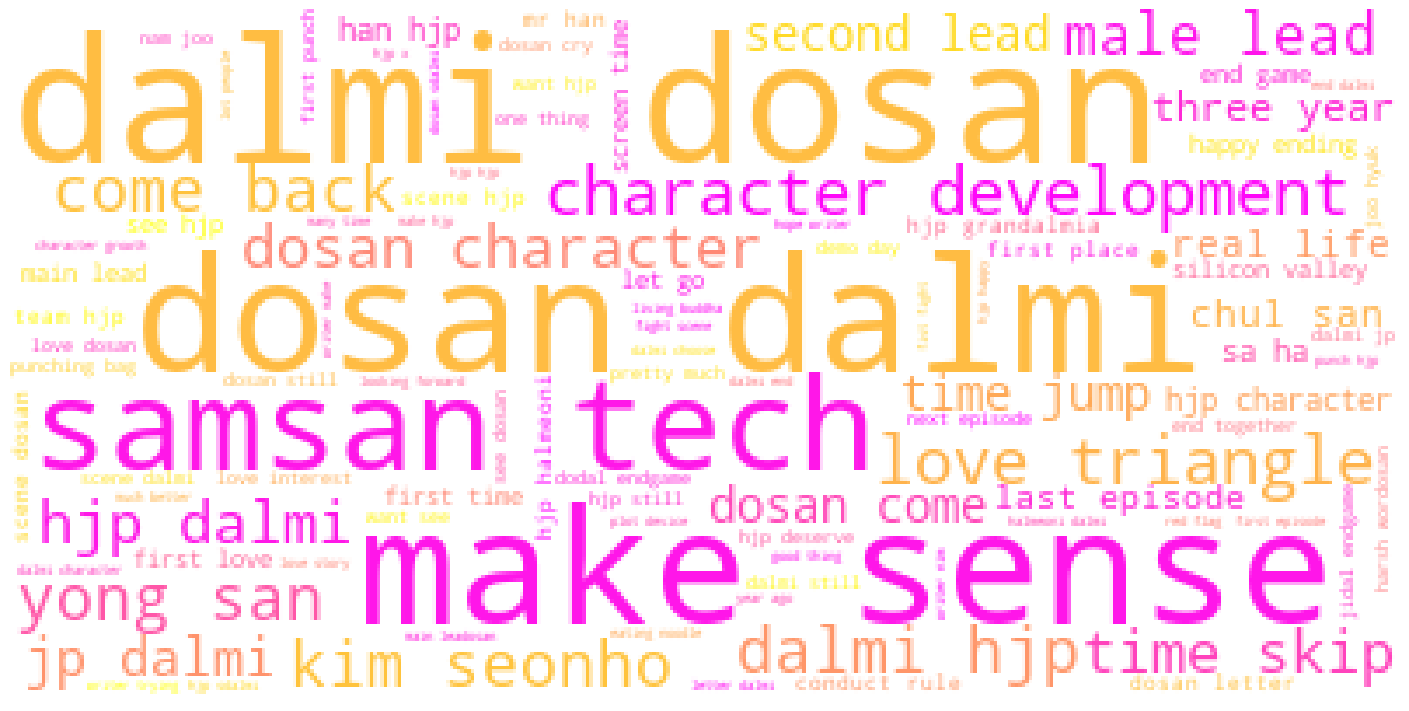

In [52]:
ep12con = (post_comments['Post Title']=="Start-Up [Episode 12]")
ep12_df = post_comments[ep12con]
abstract_ep12 = ep12_df['clean_comment'].tolist()
wordcloud = WordCloud(background_color = 'white', colormap='spring', max_words=100, max_font_size=50, random_state=42, collocation_threshold=2).generate(str(abstract_ep12))
print(wordcloud)
fig = plt.figure(figsize=(25,25))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
# fig.savefig('11-ep12-WC.png', dpi=1000)

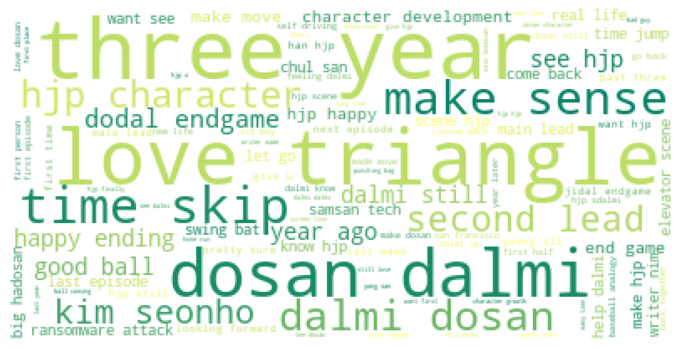

In [41]:
ep13con = (post_comments['Post Title']=="Start-Up [Episode 13]")
ep13_df = post_comments[ep13con]
abstract_ep13 = ep13_df['clean_comment'].tolist()
wordcloud = WordCloud(background_color = 'white', colormap='summer', max_words=100, max_font_size=50, random_state=42, collocation_threshold=2).generate(str(abstract_ep13))
print(wordcloud)
fig = plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
# fig.savefig('12-ep13-WC.png', dpi=1000)

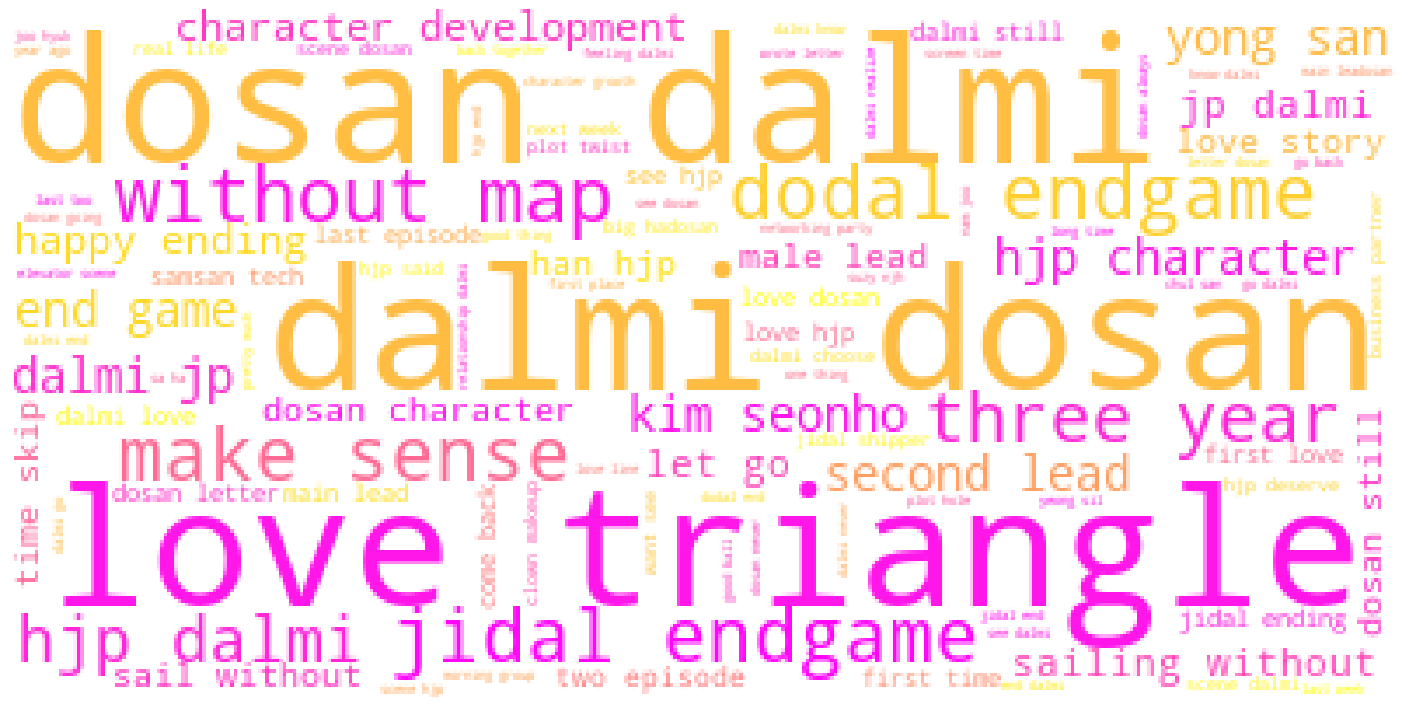

In [53]:
ep14con = (post_comments['Post Title']=="Start-Up [Episode 14]")
ep14_df = post_comments[ep14con]
abstract_ep14 = ep14_df['clean_comment'].tolist()
wordcloud = WordCloud(background_color = 'white', colormap='spring', max_words=100, max_font_size=50, random_state=42, collocation_threshold=2).generate(str(abstract_ep14))
print(wordcloud)
fig = plt.figure(figsize=(25,25))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
# fig.savefig('13-ep14-WC.png', dpi=1000)

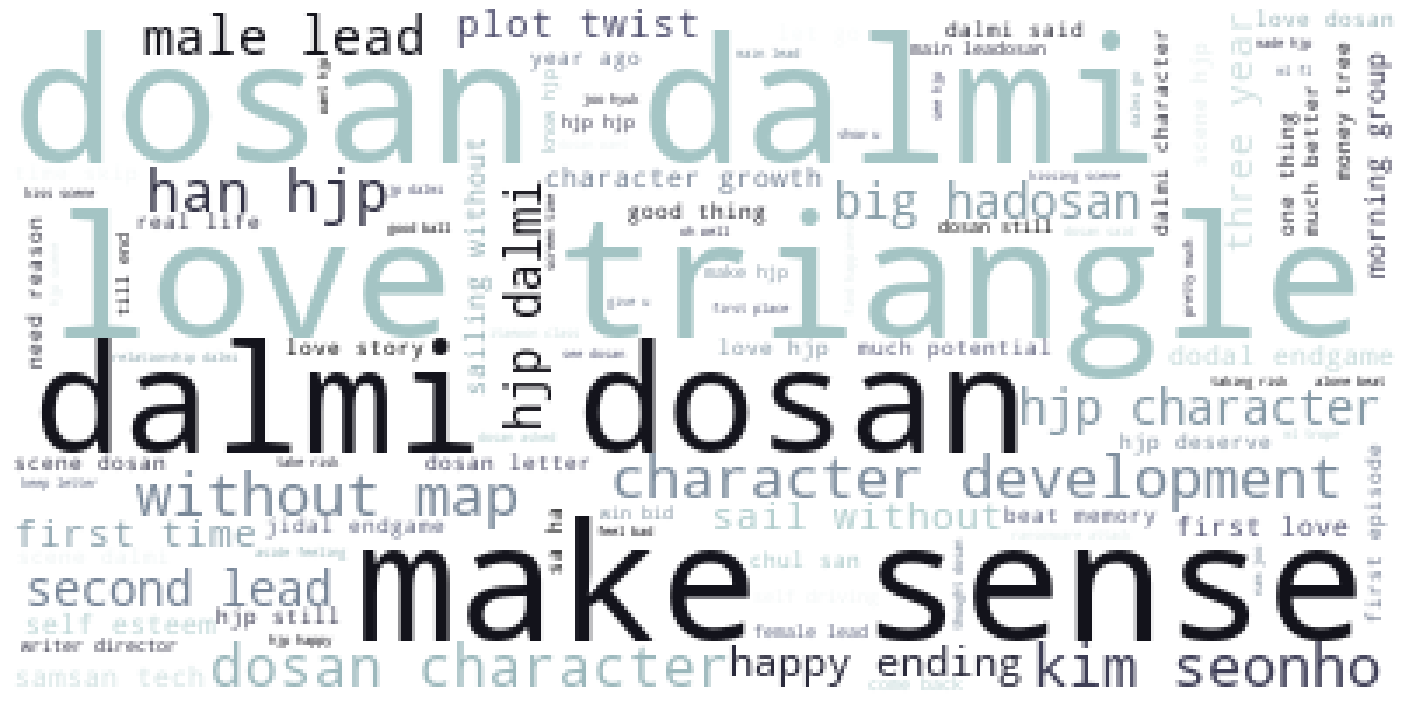

In [54]:
ep15con = (post_comments['Post Title']=="Start-Up [Episode 15]")
ep15_df = post_comments[ep15con]
abstract_ep15 = ep15_df['clean_comment'].tolist()
wordcloud = WordCloud(background_color = 'white', colormap='bone', max_words=100, max_font_size=50, random_state=42, collocation_threshold=2).generate(str(abstract_ep15))
print(wordcloud)
fig = plt.figure(figsize=(25,25))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
# fig.savefig('14-ep15-WC.png', dpi=1000)

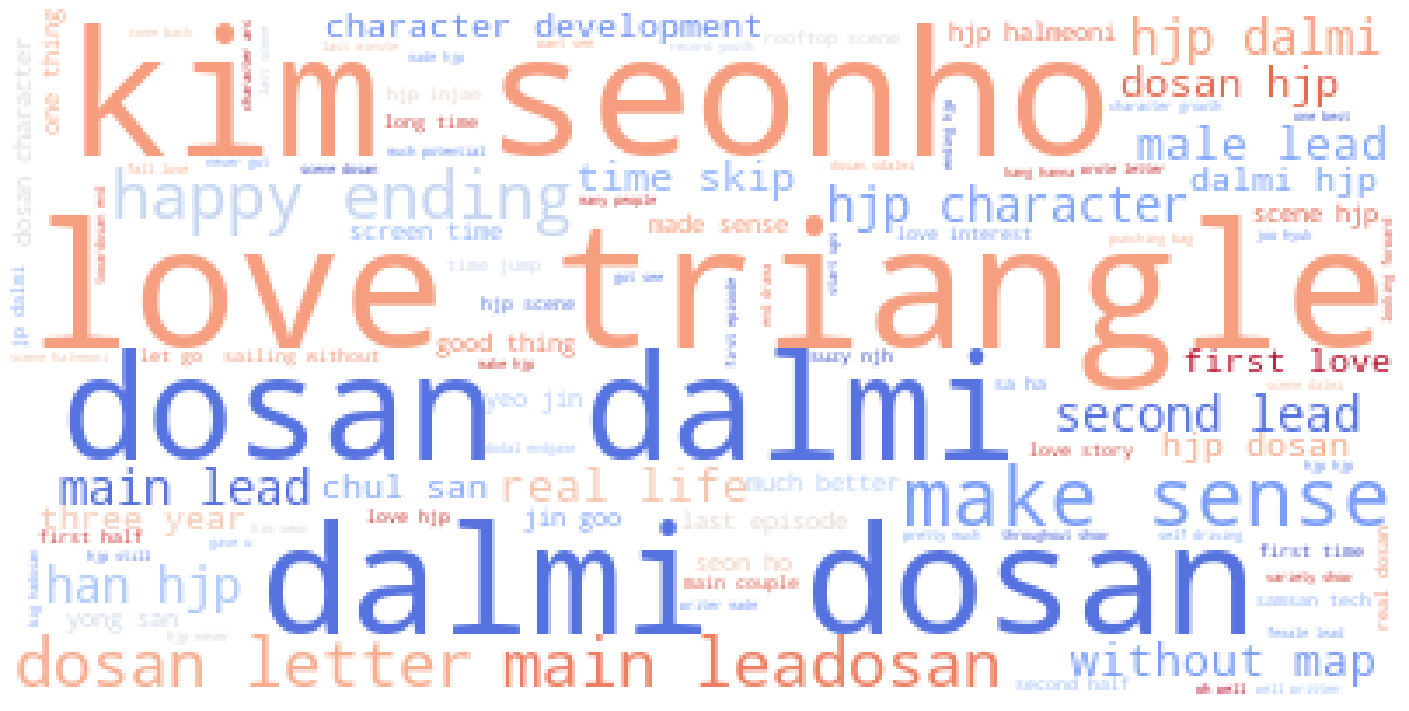

In [55]:
ep16con = (post_comments['Post Title']=="Start-Up [Episode 16] FINALE")
ep16_df = post_comments[ep16con]
abstract_ep16 = ep16_df['clean_comment'].tolist()
wordcloud = WordCloud(background_color = 'white', colormap='coolwarm', max_words=100, max_font_size=50, random_state=42, collocation_threshold=2).generate(str(abstract_ep16))
print(wordcloud)
fig = plt.figure(figsize=(25,25))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
# fig.savefig('15-ep16-WC.png', dpi=1000)